## Import necessary libraries and read CSV

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/admin/Downloads/survey lung cancer.csv')  # Change filename if needed

# Preview the data
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [5]:
# Check column names and types
df.info()

# Look for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Clean/Transform Gender and Lung_cancer fields and EDA

In [9]:
# Example: Encode gender
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})

# Encode binary responses
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Repeat for other binary/categorical columns


<Axes: xlabel='LUNG_CANCER'>

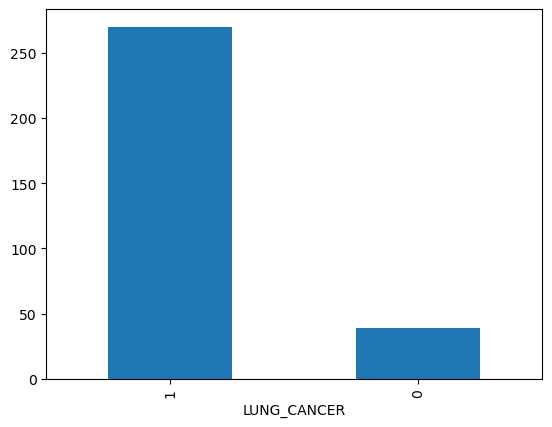

In [11]:
df['LUNG_CANCER'].value_counts().plot(kind='bar')


## Feature Engineering, Train Test Split and Model training

In [15]:
from sklearn.model_selection import train_test_split

# Select relevant features (all except target)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Train/test split (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Model Evaluation

 ##### Accuracy: Overall proportion of correct predictions.
 ##### Precision: Of those predicted as positive, how many are actually positive.
 ##### Recall: Of all actual positives, how many were identified as positive.
 ##### F1-score: Harmonic mean of precision and recall.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93

[[ 5  2]
 [ 1 85]]


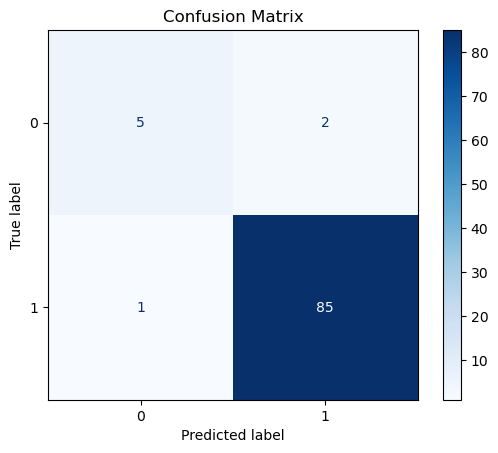

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [48]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df


,precision,recall,f1-score,support
0,0.833333,0.714286,0.769231,7.000000
1,0.977011,0.988372,0.982659,86.000000
accuracy,0.967742,0.967742,0.967742,0.967742
macro avg,0.905172,0.851329,0.875945,93.000000
weighted avg,0.966197,0.967742,0.966594,93.000000


## Feature Importance

#### Analysing which features contributed more to the output

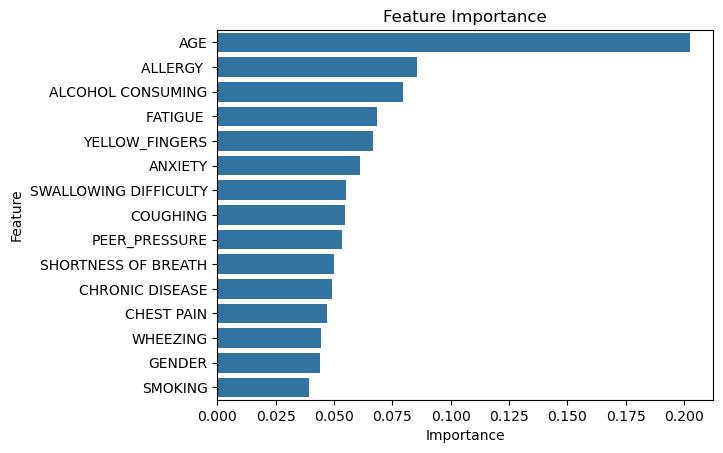

In [52]:
import seaborn as sns

# Assuming feature_importance_df is as constructed earlier
sns.barplot(y='feature', x='importance', data=feature_importance_df.sort_values('importance', ascending=False))
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Summary

#### In this project, I developed a machine learning model to predict lung cancer risk using an open lung cancer dataset containing demographic, lifestyle, and symptom features. The workflow included data exploration, cleaning, encoding, feature engineering, and model building with a supervised classification algorithm.

#### After evaluating the model’s performance using standard metrics, I analyzed feature importance to determine which variables contributed most to predictions. Age emerged as the strongest predictor of lung cancer risk, with symptoms (such as allergy, fatigue, yellow fingers, coughing, swallowing difficulty) and lifestyle factors (alcohol consumption, smoking) also playing significant roles. Surprisingly, smoking had a lower importance compared to other features, which highlights the value of a multifactorial approach to risk assessment.

#### This analysis provides interpretable, actionable insight into lung cancer risk factors and demonstrates how machine learning can aid early detection and prevention strategies. The project showcases essential data science skills—including exploratory analysis, encoding, supervised modeling, result interpretation, and practical communication of findings.